<a href="https://colab.research.google.com/github/HolyMuchii/ProcesamientoImagenesTPs/blob/main/TP5/TP5_Murilo_Alves_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practico TP5 (Transformada de Fourier y procesamiento espectral)

El objetivo de este TP es implementar un aplicativo que permita la generación de la Transformada de Fourier (TF) directa e Inversa de Imágenes, este debe permitir:
* Cargar una imagen
* Generar la TF directa de la imagen y ver su espectro
* A partir del espectro generado mediante la TF inversa obtener la imagen
* Debe permitir guardar el espectro de amplitud de una imagen en un bitmap
* Debe permitir cargar el espectro de imagen a partir de un bitmap

In [3]:
!git clone https://github.com/HolyMuchii/ProcesamientoImagenesTPs.git

Cloning into 'ProcesamientoImagenesTPs'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 61 (delta 21), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (61/61), done.


In [4]:
import imageio as io
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt

## Aplicativo com 7 figuras diferentes pré-definidas 

Três Etapas:
- Escolher a imagem e observar o spectrum
- Salvar os dados de amplitude em um bitmap
- Aplicar Filtro (Banda Alta ou Banda Baixa)

<img src="https://github.com/HolyMuchii/ProcesamientoImagenesTPs/blob/main/Image%20TF/Quadrado.png?raw=true" alt="Image01" width=200>
<img src="https://github.com/HolyMuchii/ProcesamientoImagenesTPs/blob/main/Image%20TF/Circulo.jpg?raw=true" alt="Image01" width=200>
<img src="https://github.com/HolyMuchii/ProcesamientoImagenesTPs/blob/main/Image%20TF/Triangulo.jpg?raw=true" alt="Image01" width=200>
<img src="https://github.com/HolyMuchii/ProcesamientoImagenesTPs/blob/main/Image%20TF/Triangulo%20Invertido.jpg?raw=true" alt="Image01" width=200>
<img src="https://github.com/HolyMuchii/ProcesamientoImagenesTPs/blob/main/Image%20TF/Hexagono.jpg?raw=true" alt="Image01" width=200>
<img src="https://github.com/HolyMuchii/ProcesamientoImagenesTPs/blob/main/Image%20TF/Estrela.jpg?raw=true" alt="Image01" width=200>
<img src="https://github.com/HolyMuchii/ProcesamientoImagenesTPs/blob/main/Image%20TF/Figura.jpg?raw=true" alt="Image01" width=200>

#### Escolher a imagem e observar o spectrum

Text(0.5, 1.0, 'Transf. Inversa de Fourier')

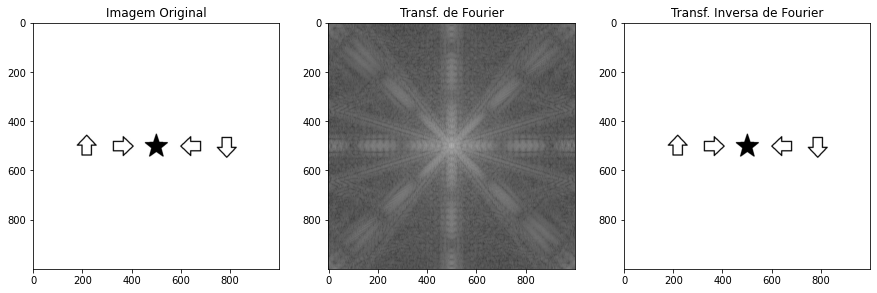

In [5]:
#@title Selecccione una Imagen. { run: "auto" }
Square = "ProcesamientoImagenesTPs/Image TF/Quadrado.png"
Circle = "ProcesamientoImagenesTPs/Image TF/Circulo.jpg"
Triangle = "ProcesamientoImagenesTPs/Image TF/Triangulo.jpg"
InvertedTriangle = "ProcesamientoImagenesTPs/Image TF/Triangulo Invertido.jpg"
Hexagon = "ProcesamientoImagenesTPs/Image TF/Hexagono.jpg"
Star = "ProcesamientoImagenesTPs/Image TF/Estrela.jpg"
Figure = "ProcesamientoImagenesTPs/Image TF/Figura.jpg"

Image = "Figure" #@param ['Square','Circle','Triangle','InvertedTriangle','Hexagon','Star','Figure']

if Image == 'Square':
  im = io.imread(Square)
elif Image == 'Cicle':
  im = io.imread(Circle)
elif Image == 'Triangle':
  im = io.imread(Triangle)
elif Image == 'InvertedTriangle':
  im = io.imread(InvertedTriangle)
elif Image == 'Hexagon':
  im = io.imread(Hexagon)
elif Image == 'Star':
  im = io.imread(Star)
elif Image == 'Figure':
  im = io.imread(Figure)

# Converter a imagem em Preto-Branco em um vetor que tem valores que vão de 0 até 1
imv = np.clip(im[:,:,0]/255.0,0,1)

# Transformada Discreta 2D de Fourier
tf = fftpack.fftshift(fftpack.fft2(imv))  # ffshift (Coloca o ponto de zero frequência no centro do spectro) ; fft2 (Transformada Discreta 2D de Fourier)
mag = np.abs(tf)
logmag = np.log(mag)

# Transformada Inversa Discreta 2D de Fourier
tfi = np.abs(np.fft.ifft2(tf))

# Plot
fig,ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(im,'gray')
ax[0].set_title('Imagem Original')

ax[1].imshow(np.log(mag),'gray')
ax[1].set_title('Transf. de Fourier')

ax[2].imshow(tfi,'gray')
ax[2].set_title('Transf. Inversa de Fourier')

#### Guarde los datos de amplitud en un bitmap

In [6]:

save = str(input('Deseja Salvar os valores de amplitude em bitmap? (S/N): '))
if save in 'Ss':
  name = str(input('Digite o nome do arquivo:'))
  io.imwrite(name +'.bmp', logmag)
  print('Spectrum Save in bitmap')
else:
  print('Spectrum não salvo')

Deseja Salvar os valores de amplitude em bitmap? (S/N): s
Digite o nome do arquivo:oi


Spectrum Save in bitmap


#### Aplicar filtro (Banda Alta o Banda Baja)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Imagem Filtrada')

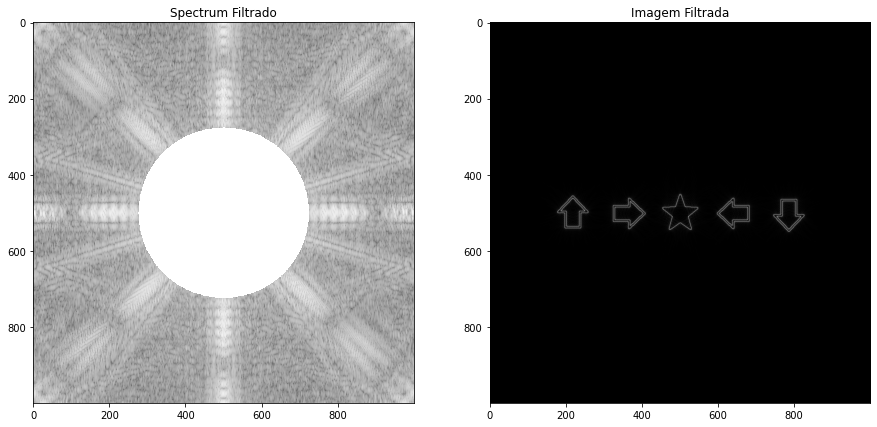

In [8]:
tfb = tf.copy()
rows, cols = tfb.shape
crow, ccol = int(rows/2), int(cols/2)

mask = np.ones((rows,cols,1),np.uint8)
#@title Radio Utilizado en la Banda { run: "auto" }
r = 221 #@param {type:"slider", min:0, max:500, step:1}
center = [crow,ccol]
x,y = np.ogrid[:rows, :cols]

#@title Selecccione una Banda. { run: "auto" }
Banda = "Banda Alta" #@param ['Banda Alta','Banda Baja']
if Banda in 'Banda Alta':
  mask_area = (x-center[0])**2 + (y-center[1])**2 <= r*r
elif Banda in 'Banda Baja':
  mask_area = (x-center[0])**2 + (y-center[1])**2 > r*r

tfb[mask_area] = 0

fig,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(np.log(np.abs(tfb)),'gray')
ax[0].set_title('Spectrum Filtrado')

ax[1].imshow(np.abs(np.fft.ifft2(tfb)),'gray')
ax[1].set_title('Imagem Filtrada')
# plt.imshow(np.log(np.abs(tfb)),'gray')

## Aplicación que Utiliza Imágenes de Internet

In [ ]:
def image_to_rgb (image):
  r = image[:,:,0]
  g = image[:,:,1]
  b = image[:,:,2]
  return (r,g,b)

def rgb_to_yiq(r,g,b):
  y = (0.299*r + 0.587*g + 0.114*b)/255
  i = (0.595716*r - 0.274453*g - 0.321263*b)/255
  q = (0.211456*r - 0.522591*g + 0.311135*b)/255
  return y,i,q

def yiq_clip(y,i,q):
  y2 = np.clip(y,0.0,1.0)
  i2 = np.clip(i,-0.5957,0.5957)
  q2 = np.clip(q,-0.5226,0.5226)
  return y2,i2,q2

def yiq_to_rgb(y,i,q):
  r = (y + 0.9663*i + 0.6210*q)*255
  g = (y - 0.2721*i - 0.6474*q)*255
  b = (y - 1.1070*i + 1.7046*q)*255
  return r,g,b

def rgb_clip(r,g,b):
  r2 = np.clip(r,0,255)
  g2 = np.clip(g,0,255)
  b2 = np.clip(b,0,255)
  return r2,g2,b2

def rgb_to_image(r,g,b):
  image=np.zeros((r.shape[0],r.shape[1],3))
  image[:,:,0]=r
  image[:,:,1]=g
  image[:,:,2]=b
  image_int = image.astype(np.uint8)
  return image_int

Coloque a hub da imagem aqui: https://super.abril.com.br/wp-content/uploads/2019/12/supawat-kampanna_eyeem_gettyimages_plantas-sons-estressadas.jpg?quality=90&strip=info&resize=680,453


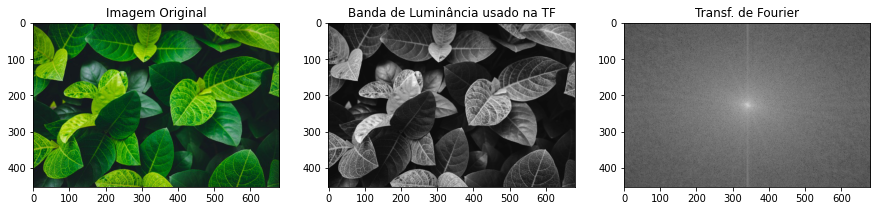

In [ ]:
# image example: https://super.abril.com.br/wp-content/uploads/2019/12/supawat-kampanna_eyeem_gettyimages_plantas-sons-estressadas.jpg?quality=90&strip=info&resize=680,453

escolha = input('Deseja alterar uma imagem normal (RGB)')

diretorio = input('Coloque a hub da imagem aqui: ')
image = io.imread(diretorio)
    
r,g,b = image_to_rgb(image)
y,i,q = rgb_to_yiq(r,g,b)
y,i,q = yiq_clip(y,i,q)

# Transformada Discreta 2D de Fourier
ytf = fftpack.fftshift(fftpack.fft2(y))  # ffshift (Coloca o ponto de zero frequência no centro do spectro) ; fft2 (Transformada Discreta 2D de Fourier)
ymag = np.abs(ytf)
ylogmag = np.log(ymag)

# Transformada Inversa Discreta 2D de Fourier
ytfi = np.abs(np.fft.ifft2(ytf))

fig,ax = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(image)
ax[0].set_title('Imagem Original')

ax[1].imshow(y,'gray')
ax[1].set_title('Banda de Luminância usado na TF')

ax[2].imshow(np.log(ymag),'gray')
ax[2].set_title('Transf. de Fourier')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Imagem Filtrada')

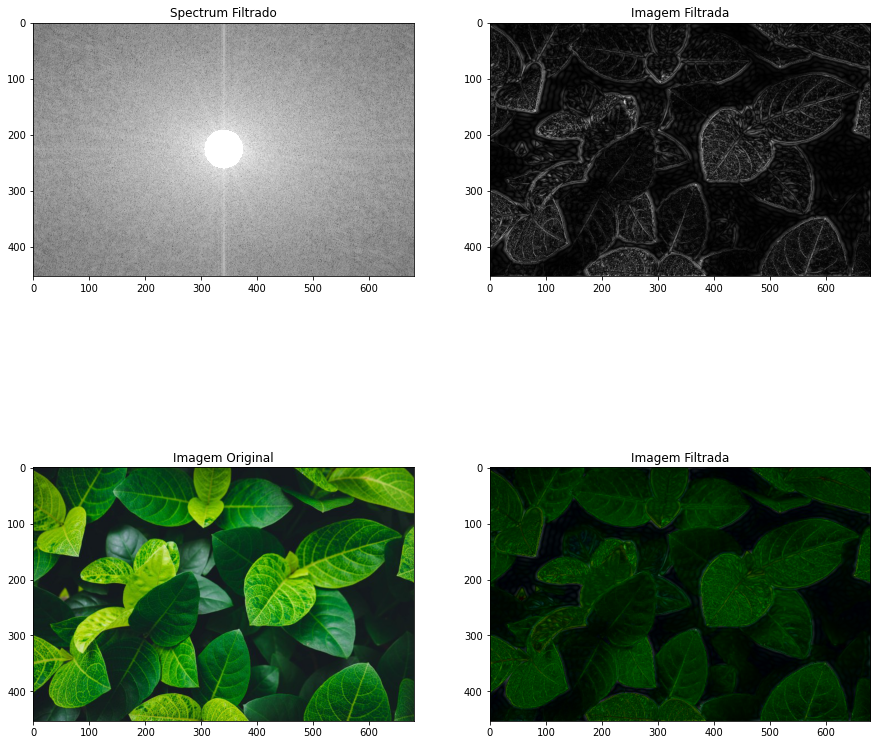

In [ ]:
tfb2 = ytf.copy()
rows2, cols2 = tfb2.shape
crow2, ccol2 = int(rows2/2), int(cols2/2)

mask2 = np.ones((rows2,cols2,1),np.uint8)
#@title Raio Utilizado en la Banda { run: "auto" }
r2 = 33 #@param {type:"slider", min:0, max:500, step:1}
center2 = [crow2,ccol2]
x2,y2 = np.ogrid[:rows2, :cols2]

#@title Selecccione una Banda. { run: "auto" }
Banda = "Banda Alta" #@param ['Banda Alta','Banda Baja']
if Banda in 'Banda Alta':
  mask_area2 = (x2-center2[0])**2 + (y2-center2[1])**2 <= r2*r2
elif Banda in 'Banda Baja':
  mask_area2 = (x2-center2[0])**2 + (y2-center2[1])**2 > r2*r2

tfb2[mask_area2] = 0

y3 = np.abs(np.fft.ifft2(tfb2))

r3,g3,b3 = yiq_to_rgb(y3,i,q)
r3,g3,b3 = rgb_clip(r3,g3,b3)
image_filtrada = rgb_to_image(r3,g3,b3)

fig,ax = plt.subplots(2,2,figsize=(15,15))
ax[0,0].imshow(np.log(np.abs(tfb2)),'gray')
ax[0,0].set_title('Spectrum Filtrado')

ax[0,1].imshow(y3,'gray')
ax[0,1].set_title('Imagem Filtrada')

ax[1,0].imshow(image)
ax[1,0].set_title('Imagem Original')

ax[1,1].imshow(image_filtrada)
ax[1,1].set_title('Imagem Filtrada')


## Análisis de resultados:
- Filtrando la Baja Frecuencia, podemos ver el contorno de los objetos en la imagen.
- Filtrado a Alta Frecuencia, no parece tener un efecto aparente en la imagen utilizada

- No es posible devolver la foto a RGB después de eliminar la baja frecuencia de la banda Y en YIQ. La imagen no presentará resultados de discretización de contorno satisfactorios (mejor que usar solo la banda Y)